In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


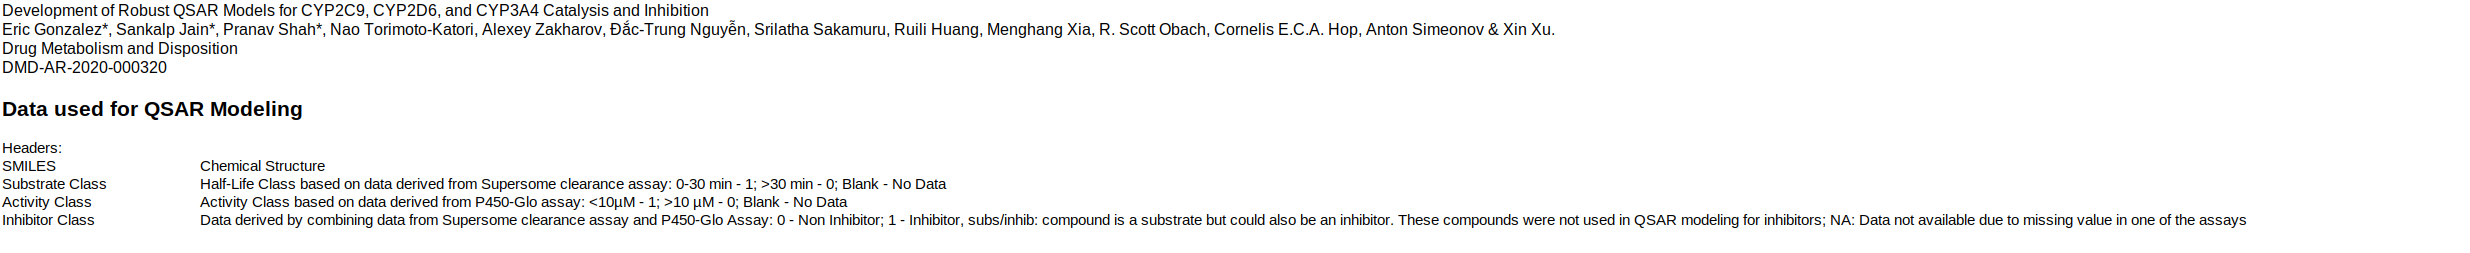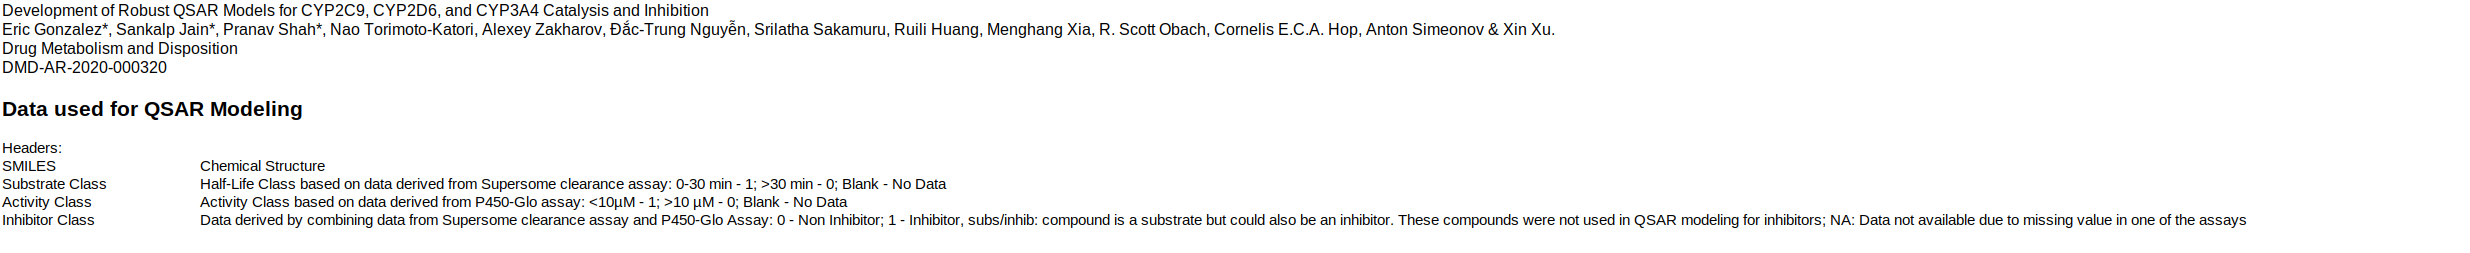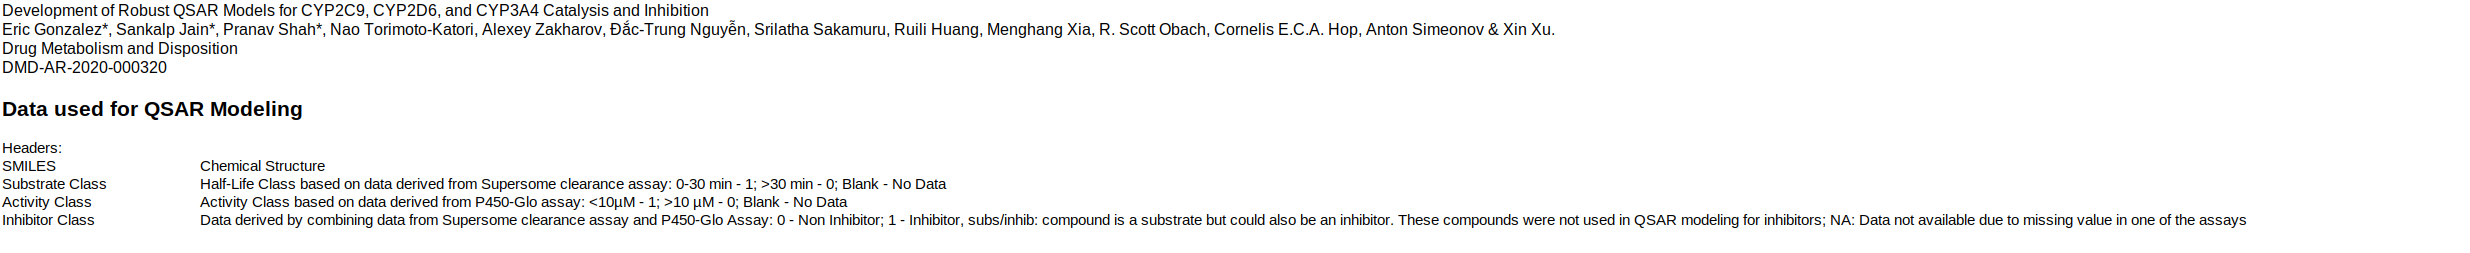

In [5]:
df = pd.read_csv("./XinXu_NCATS_ADME_raw/DMD320R2_Supp2.csv")
df

SMILES  \
0                             CC(C)(C)C1=C(O)C=CC(O)=C1   
1                            OC(=O)C\C(=C/C(O)=O)C(O)=O   
2                                   CC(C)=CCC\C(C)=C\CO   
3     CC1=CC(N)=C2C=C(NC(=O)NC3=CC4=C(C=C3)N=C(C)C=C...   
4                               CC1=C(O)C(CN)=C(CO)C=N1   
...                                                 ...   
4297  CCOC(=O)CSC1=NC2=C(SC3=C2C=CC=C3)C(=O)N1CCCN4C...   
4298  CCC1=CC=C(C=C1)C2=NC(CSCC(=O)NCCC3=CC=CC=C3)=C...   
4299  CC(C)[C@H](N1CCC(CC1)C(O)=O)C2=C(CN(CC3=CC(=CC...   
4300  COCCOC1=NC2=C(NC(=O)N2CC3=CC=C(C=C3)C(O)=O)C(N...   
4301  OC(=O)C1=C(NC(=O)COCC(=O)N2CCN(CC2)C(C3=CC=CC=...   

      CYP2C9 Substrate Class  CYP2D6 Substrate Class  CYP3A4 Substrate Class  \
0                        0.0                     0.0                     0.0   
1                        NaN                     0.0                     NaN   
2                        0.0                     1.0                     0.0   
3                        0.0                     0.0                     NaN   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
4297                     0.0                     1.0                     1.0   
4298                     1.0                     NaN                     1.0   
4299                     0.0                     0.0                     1.0   
4300                     NaN                     0.0                     NaN   
4301                     NaN                     1.0                     NaN   

      CYP2C9 Activity Class  CYP2D6 Activity Class  CYP3A4 Activity Class  \
0                       0.0                    0.0                    1.0   
1                       0.0                    0.0                    0.0   
2                       0.0                    0.0                    0.0   
3                       0.0                    1.0                    0.0   
4                       0.0                    0.0                    0.0   
...                     ...                    ...                    ...   
4297                    0.0                    1.0                    1.0   
4298                    1.0                    0.0                    1.0   
4299                    0.0                    0.0                    1.0   
4300                    0.0                    0.0                    0.0   
4301                    0.0                    0.0                    0.0   

     CYP2C9 Inhibitor Class CYP2D6 Inhibitor Class CYP3A4_ Inhibitor Class  
0                         0                      0                       1  
1                       NaN                      0                     NaN  
2                         0                      0                       0  
3                         0                      1                     NaN  
4                         0                      0                       0  
...                     ...                    ...                     ...  
4297                      0             subs/inhib              subs/inhib  
4298             subs/inhib                    NaN              subs/inhib  
4299                      0                      0              subs/inhib  
4300                    NaN                      0                     NaN  
4301                    NaN                      0                     NaN  

[4302 rows x 10 columns]

In [6]:
df.columns

Index(['SMILES', 'CYP2C9 Substrate Class', 'CYP2D6 Substrate Class',
       'CYP3A4 Substrate Class', 'CYP2C9 Activity Class',
       'CYP2D6 Activity Class', 'CYP3A4 Activity Class',
       'CYP2C9 Inhibitor Class', 'CYP2D6 Inhibitor Class',
       'CYP3A4_ Inhibitor Class'],
      dtype='object')

In [9]:
df["CYP3A4_ Inhibitor Class"].value_counts()

CYP3A4_ Inhibitor Class
0             2454
subs/inhib    1030
1              340
Name: count, dtype: int64

In [10]:
df["CYP3A4 Activity Class"].value_counts()

CYP3A4 Activity Class
0.0    2682
1.0    1453
Name: count, dtype: int64

In [11]:
df["CYP3A4 Substrate Class"].value_counts()

CYP3A4 Substrate Class
0.0    2091
1.0    1883
Name: count, dtype: int64

In [14]:
df_substrates = df[df["CYP3A4 Substrate Class"] == 1.0]

SMILES  \
5                    N[S+]([O-])(=O)C1=CC=C(C=C1)C(O)=O   
8           CN(C)CC\C=C1/C2=C(SC3=C1C=C(Cl)C=C3)C=CC=C2   
9                                   OP(O)(=O)OP(O)(O)=O   
15    ClC1=CC=C2N(C3CCN(CCCN4C(=O)NC5=C4C=CC=C5)CC3)...   
16                ClC1=C(C=CC=C1)C2=NC(=NO2)C3=CC=NC=C3   
...                                                 ...   
4287  CC(=C)CN1C(=O)C2=C(SC3=C2CCCC3)N=C1SCC(=O)C4=C...   
4288  CC1=CC(NC(=O)NCCN2CCC(O)(CC3=CC=CC=C3)CC2)=C4C...   
4297  CCOC(=O)CSC1=NC2=C(SC3=C2C=CC=C3)C(=O)N1CCCN4C...   
4298  CCC1=CC=C(C=C1)C2=NC(CSCC(=O)NCCC3=CC=CC=C3)=C...   
4299  CC(C)[C@H](N1CCC(CC1)C(O)=O)C2=C(CN(CC3=CC(=CC...   

      CYP2C9 Substrate Class  CYP2D6 Substrate Class  CYP3A4 Substrate Class  \
5                        0.0                     0.0                     1.0   
8                        1.0                     1.0                     1.0   
9                        1.0                     NaN                     1.0   
15                       0.0                     0.0                     1.0   
16                       0.0                     1.0                     1.0   
...                      ...                     ...                     ...   
4287                     1.0                     1.0                     1.0   
4288                     0.0                     0.0                     1.0   
4297                     0.0                     1.0                     1.0   
4298                     1.0                     NaN                     1.0   
4299                     0.0                     0.0                     1.0   

      CYP2C9 Activity Class  CYP2D6 Activity Class  CYP3A4 Activity Class  \
5                       NaN                    NaN                    NaN   
8                       0.0                    1.0                    0.0   
9                       0.0                    0.0                    0.0   
15                      0.0                    1.0                    0.0   
16                      1.0                    1.0                    0.0   
...                     ...                    ...                    ...   
4287                    0.0                    0.0                    1.0   
4288                    0.0                    1.0                    0.0   
4297                    0.0                    1.0                    1.0   
4298                    1.0                    0.0                    1.0   
4299                    0.0                    0.0                    1.0   

     CYP2C9 Inhibitor Class CYP2D6 Inhibitor Class CYP3A4_ Inhibitor Class  
5                       NaN                    NaN                     NaN  
8                         0             subs/inhib                       0  
9                         0                    NaN                       0  
15                        0                      1                       0  
16                        1             subs/inhib                       0  
...                     ...                    ...                     ...  
4287                      0                      0              subs/inhib  
4288                      0                      1                       0  
4297                      0             subs/inhib              subs/inhib  
4298             subs/inhib                    NaN              subs/inhib  
4299                      0                      0              subs/inhib  

[1883 rows x 10 columns]

In [16]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [17]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [18]:

with BlockLogs():
    df["CANONICAL_SMILES"] = df["SMILES"].progress_apply(lambda x: standardize_smiles(x))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4302/4302 [00:31<00:00, 136.33it/s]


In [19]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [20]:
# compute inchikeys
with BlockLogs():
    df["INCHIKEY"] = df["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4302/4302 [00:01<00:00, 3900.64it/s]


In [21]:
# not much more to do really
df["dataset"] = "XinXu_NCATS_ADME_raw"
df["data_type"] = "assay" # going to assume assay
df["action_type"] = "substrate"

In [22]:
df.to_csv("processed/xin_xu_ncats_adme.csv", index=False)